# Multiple Linear Regression Bike Sharing Case Study

### Business Objective:
Due to heavy losses incurred by a bike rental company, BoomBikes, there is a need to come up with a mindful business plan to analyze the demand for bike sharing and come up with factors / variables responsible for company's growth & recover the lost revenue.  

The solution is divided into the following sections: 
- Data understanding
- Data visualisation and preparation
- Model building and evaluation

#### Data understanding

In [43]:
# Importing the libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [45]:
# Dataframe

bs_df = pd.read_csv("day.csv")
bs_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [47]:
bs_df.shape

(730, 16)

In [49]:
bs_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [51]:
bs_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [53]:
# Aligning to data dictionary for Season
bs_df.loc[(bs_df['season'] == 1) , 'season'] = 'spring'
bs_df.loc[(bs_df['season'] == 2) , 'season'] = 'summer'
bs_df.loc[(bs_df['season'] == 3) , 'season'] = 'fall'
bs_df.loc[(bs_df['season'] == 4) , 'season'] = 'winter'

In [55]:
bs_df['season'].astype('category').value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [57]:
# Aligning to year (0: 2018, 1:2019)
bs_df['yr'].astype('category').value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [59]:
# Aligning to months

def object_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

bs_df[['mnth']] = bs_df[['mnth']].apply(object_map)


In [61]:
bs_df['mnth'].astype('category').value_counts()

mnth
Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: count, dtype: int64

In [63]:
bs_df['holiday'].astype('category').value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [65]:
# Aligining to weekday

def str_map(x):
    return x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

bs_df[['weekday']] = bs_df[['weekday']].apply(str_map)

In [67]:
bs_df['weekday'].astype('category').value_counts()

weekday
Mon      105
Tues     105
Wed      105
Sat      104
Sun      104
Thurs    104
Fri      103
Name: count, dtype: int64

In [69]:
bs_df['workingday'].astype('category').value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [71]:
# Changing weather descriptions

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
bs_df.loc[(bs_df['weathersit'] == 1) , 'weathersit'] = 'A'

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
bs_df.loc[(bs_df['weathersit'] == 2) , 'weathersit'] = 'B'

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
bs_df.loc[(bs_df['weathersit'] == 3) , 'weathersit'] = 'C'

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bs_df.loc[(bs_df['weathersit'] == 4) , 'weathersit'] = 'D'

In [73]:
bs_df['weathersit'].unique()

array(['B', 'A', 'C'], dtype=object)

#### Data visualization and preparation 

<Axes: xlabel='weathersit', ylabel='cnt'>

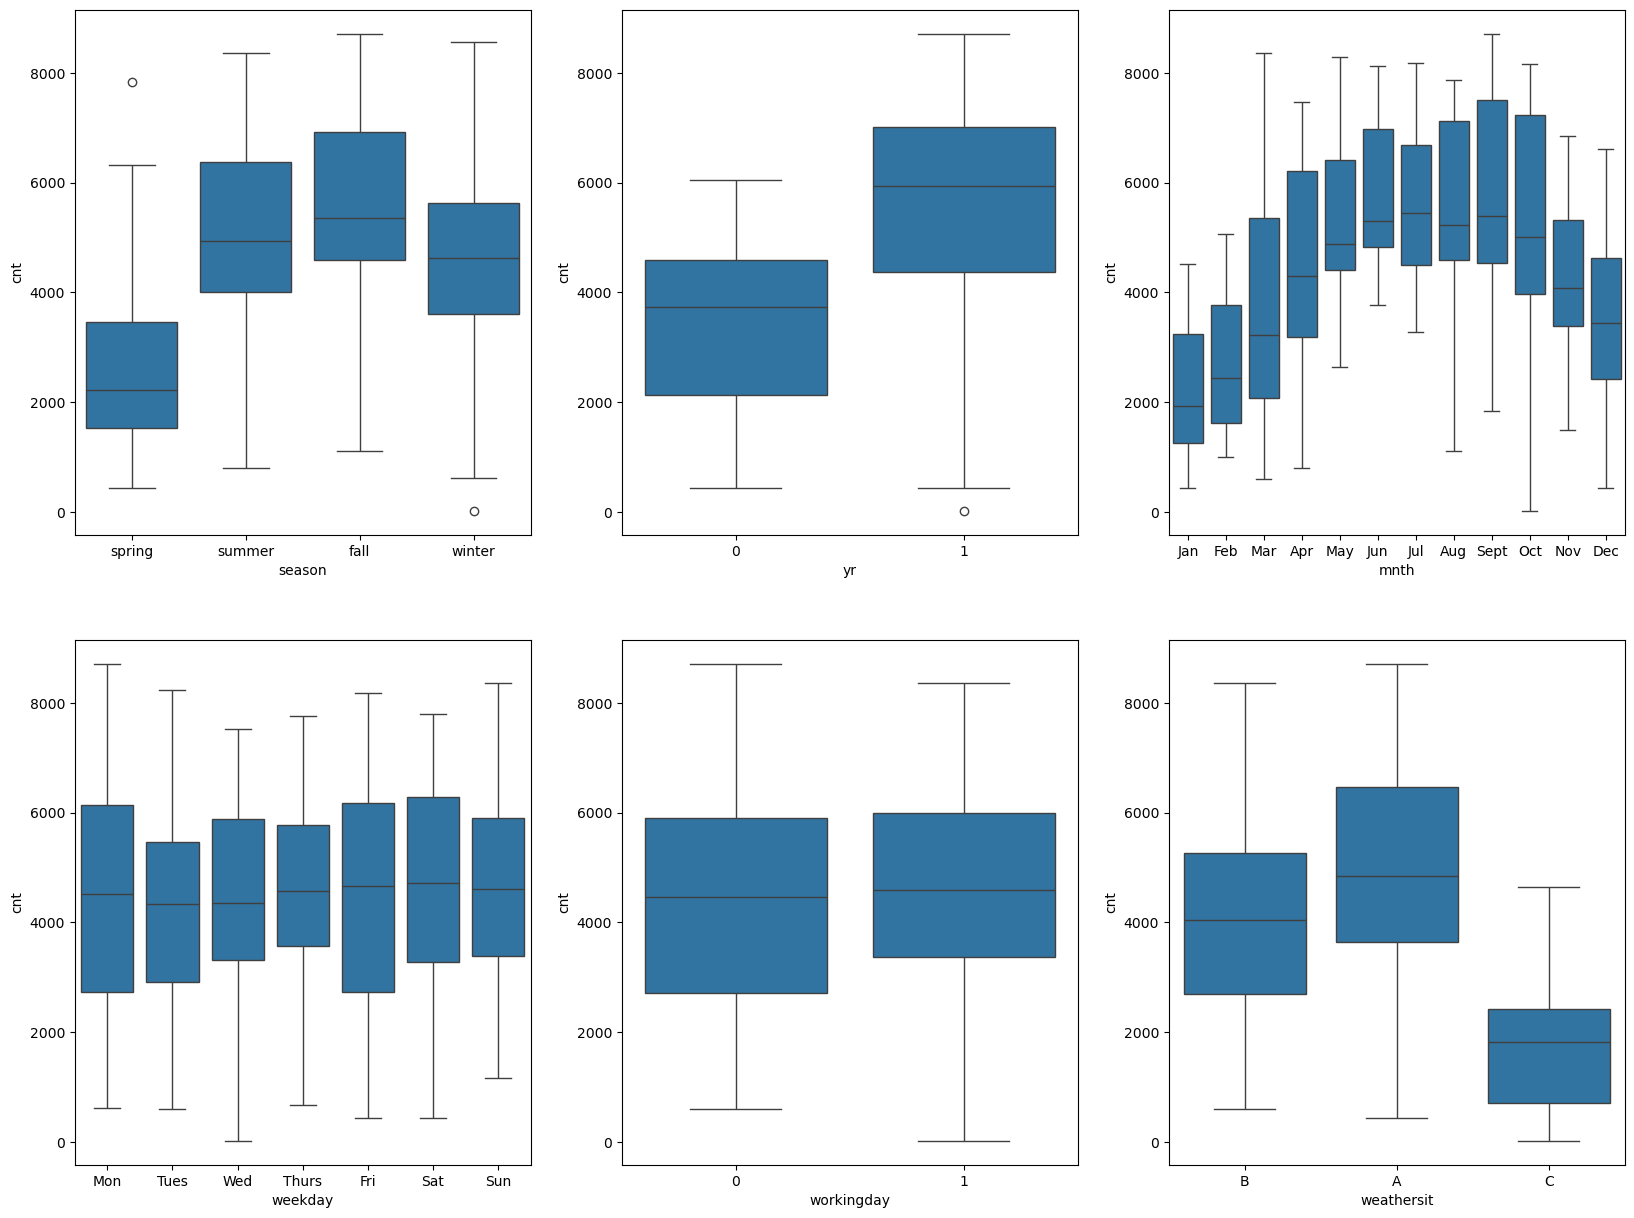

In [88]:
#visualising heatmap for the categorical variables

plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bs_df)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=bs_df)

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=bs_df)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=bs_df)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=bs_df)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bs_df)

#### Univariate Analysis

Text(0.5, 0, 'Total Bike Rentals per Day')

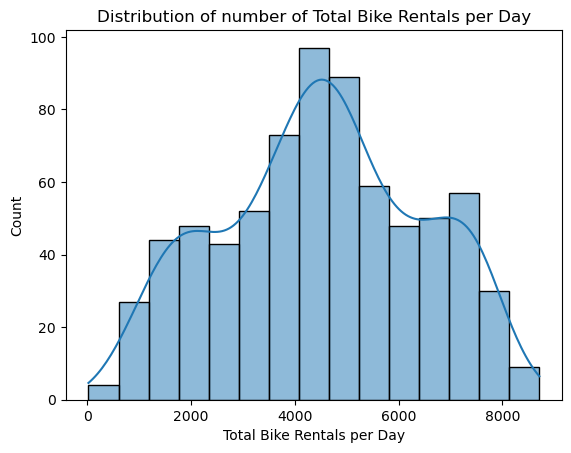

In [91]:
# Total Bike Rentals

sns.histplot(bs_df.cnt, bins = 15, kde=True)
plt.title('Distribution of number of Total Bike Rentals per Day')
plt.xlabel('Total Bike Rentals per Day')

Text(0.5, 0, 'WindSpeed')

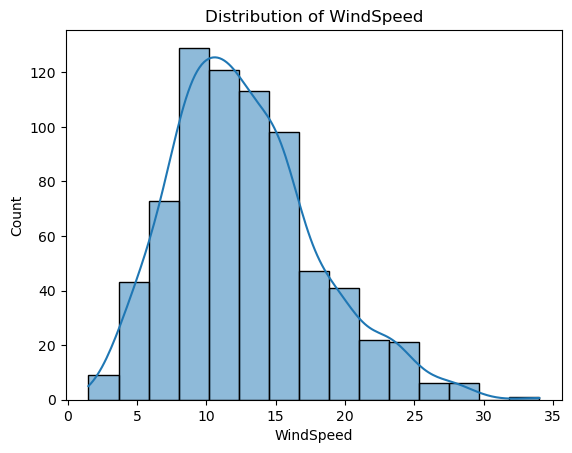

In [93]:
# Windspeed

sns.histplot(bs_df.windspeed, bins = 15, kde=True)
plt.title('Distribution of WindSpeed')
plt.xlabel('WindSpeed')

Text(0.5, 0, 'Humidity')

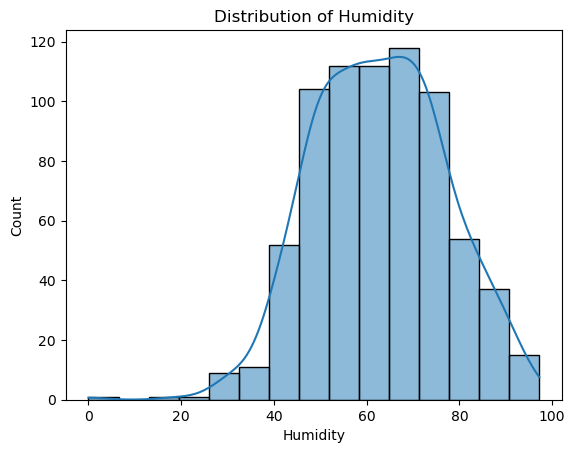

In [95]:
# Humidity 

sns.histplot(bs_df.hum, bins = 15, kde=True)
plt.title('Distribution of Humidity')
plt.xlabel('Humidity')

Text(0.5, 0, 'Temperature')

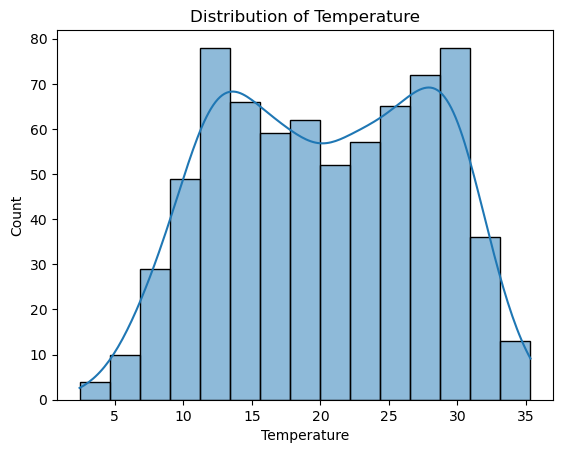

In [97]:
# Temperature

sns.histplot(bs_df.temp, bins = 15, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')

Text(0.5, 0, 'feels-like Temperature')

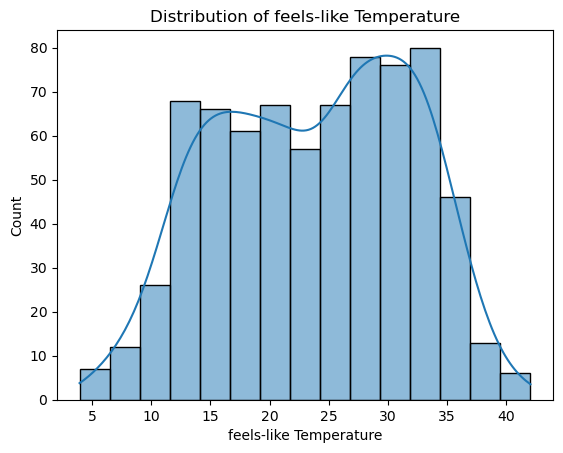

In [99]:
# Feels like Temperature

sns.histplot(bs_df.atemp, bins = 15, kde=True)
plt.title('Distribution of feels-like Temperature')
plt.xlabel('feels-like Temperature')

#### Bivariate Analysis

<Figure size 2000x1500 with 0 Axes>

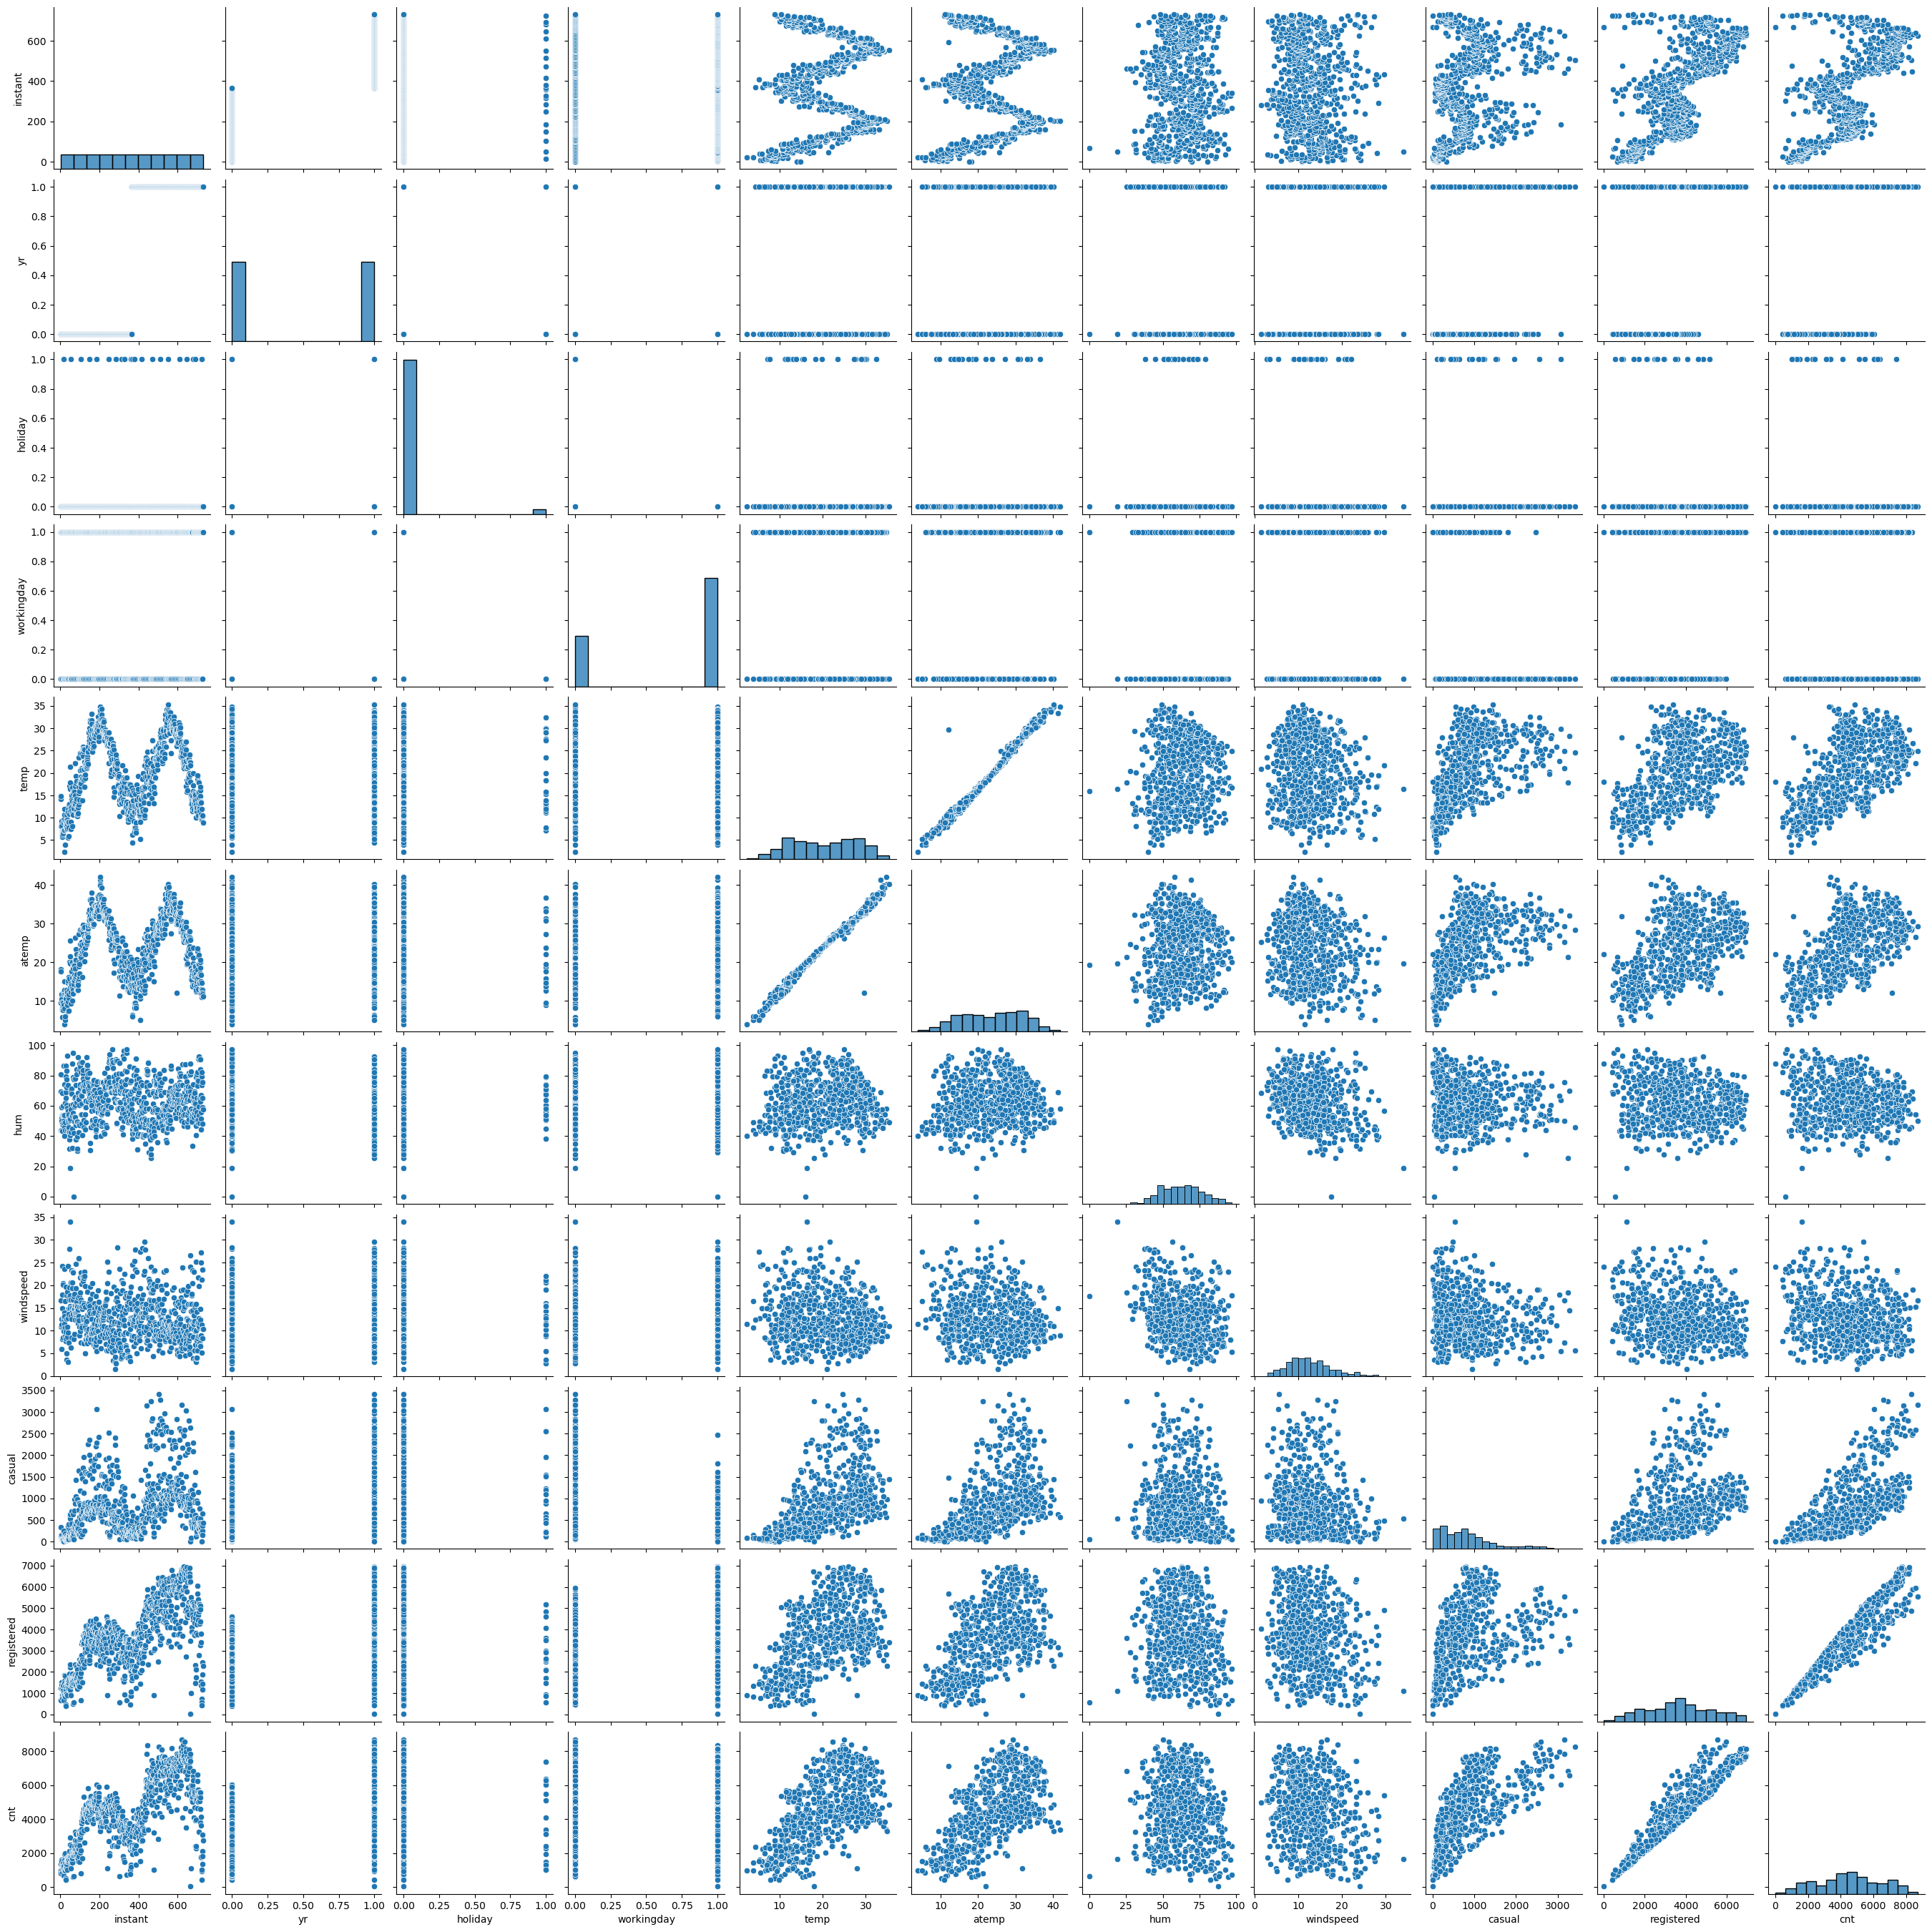

In [101]:
# Pairplot

plt.figure(figsize=(20,15))
sns.pairplot(bs_df)
plt.show()

#### Multivariate Analysis

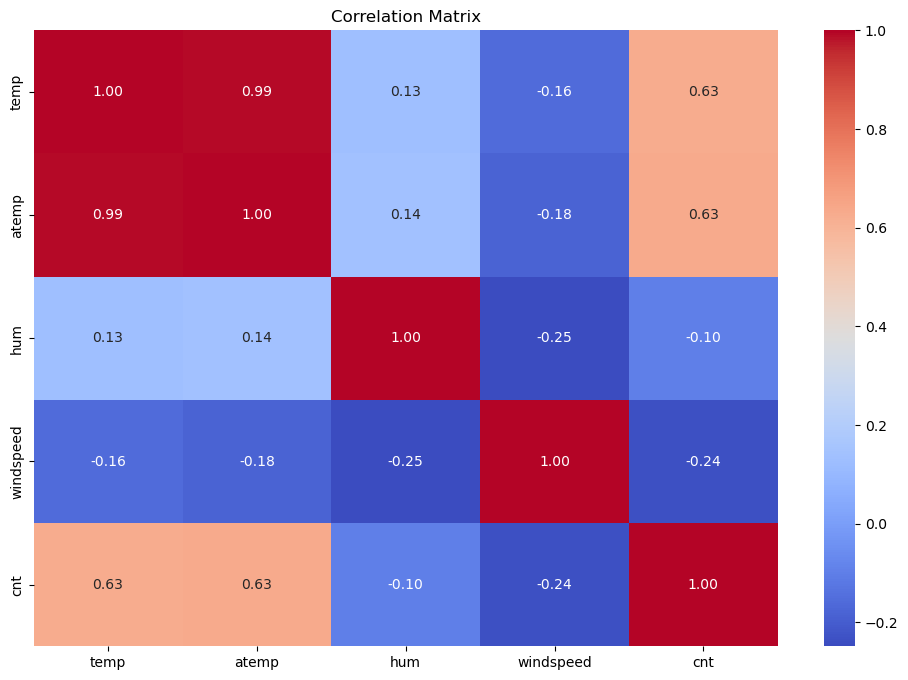

In [105]:
# Column definition
columns = ['temp', 'atemp', 'hum', 'windspeed','cnt']

# Correlation matrix
correlation_matrix = bs_df[columns].corr()

# Correlation matrix plotting 
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [109]:
# Converting date to datetime format
bs_df['dteday']=bs_df['dteday'].astype('datetime64[ns]')

In [111]:
# All categorical variables in the dataset
bs_df_categorical=bs_df.select_dtypes(exclude=['float64','datetime64','int64'])
print(bs_df_categorical.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [113]:
bs_df_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,B
1,spring,Jan,Tues,B
2,spring,Jan,Wed,A
3,spring,Jan,Thurs,A
4,spring,Jan,Fri,A
...,...,...,...,...
725,spring,Dec,Sat,B
726,spring,Dec,Sun,B
727,spring,Dec,Mon,B
728,spring,Dec,Tues,A


In [115]:
#removing atemp as it is highly correlated with temp
bs_df.drop('atemp',axis=1,inplace=True) 

In [117]:
# Subset all categorical variables
bs_df_categorical=bs_df.select_dtypes(include=['object'])

In [119]:
# Dummies conversion
bs_df_dummies = pd.get_dummies(bs_df_categorical, drop_first=True)
bs_df_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [121]:
# Drop categorical variable columns
bs_df = bs_df.drop(list(bs_df_categorical.columns), axis=1)

In [123]:
# Concatenate dummies with original
bs_df = pd.concat([bs_df, bs_df_dummies], axis=1)

In [125]:
bs_df.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331,654,...,False,False,True,False,False,False,False,False,True,False
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131,670,...,False,False,False,False,False,False,True,False,True,False
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120,1229,...,False,False,False,False,False,False,False,True,False,False
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108,1454,...,False,False,False,False,False,True,False,False,False,False
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82,1518,...,False,False,False,False,False,False,False,False,False,False


In [127]:
# Drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
bs_df=bs_df.drop(['instant','dteday'], axis = 1, inplace = False)
bs_df.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,331,654,985,True,...,False,False,True,False,False,False,False,False,True,False
1,0,0,0,14.902598,69.6087,16.652113,131,670,801,True,...,False,False,False,False,False,False,True,False,True,False
2,0,0,1,8.050924,43.7273,16.636703,120,1229,1349,True,...,False,False,False,False,False,False,False,True,False,False
3,0,0,1,8.200000,59.0435,10.739832,108,1454,1562,True,...,False,False,False,False,False,True,False,False,False,False
4,0,0,1,9.305237,43.6957,12.522300,82,1518,1600,True,...,False,False,False,False,False,False,False,False,False,False


#### Model Building and Evaluation

In [130]:
# Train test split per industry standard

from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(bs_df, train_size=0.7, test_size=0.3, random_state=100)

In [132]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922,6612,7534,False,...,True,False,False,False,False,True,False,False,False,False
576,1,0,1,29.246653,70.4167,11.083475,968,6248,7216,False,...,False,False,False,False,False,True,False,False,False,False
426,1,0,0,16.980847,62.1250,10.792293,956,3110,4066,True,...,False,False,True,False,False,False,False,False,True,False
728,1,0,0,10.489153,48.3333,23.500518,364,1432,1796,True,...,False,False,False,False,False,False,True,False,False,False
482,1,0,0,15.443347,48.9583,8.708325,1120,3100,4220,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017,5647,6664,False,...,False,False,False,False,False,False,False,True,True,False
578,1,0,1,30.852500,65.9583,8.666718,983,6278,7261,False,...,False,False,False,True,False,False,False,False,False,False
53,0,0,1,9.091299,42.3043,6.305571,139,1778,1917,True,...,False,False,False,False,False,False,False,False,False,False
350,0,0,0,10.591653,56.0833,16.292189,275,2464,2739,False,...,False,False,True,False,False,False,False,False,True,False


In [134]:
df_test

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,29.793347,63.7917,5.459106,3065,2978,6043,False,...,False,False,False,False,False,False,False,True,True,False
535,1,0,1,32.082500,59.2083,7.625404,872,5339,6211,False,...,False,False,False,False,False,False,False,False,False,False
299,0,0,1,19.270000,81.2917,13.250121,240,2419,2659,False,...,True,False,False,True,False,False,False,False,True,False
221,0,0,1,31.433347,42.4167,13.417286,884,3896,4780,False,...,False,False,False,False,False,False,False,False,False,False
152,0,0,1,29.315000,30.5000,19.583229,736,4232,4968,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,10.899153,68.7917,11.791732,318,2629,2947,True,...,False,False,False,False,False,False,True,False,True,False
702,1,0,1,19.509153,73.3750,11.666643,551,6055,6606,False,...,False,False,False,False,False,True,False,False,False,False
127,0,0,0,21.661653,63.1667,5.000712,1401,2932,4333,False,...,False,False,False,False,False,False,True,False,False,False
640,1,0,1,26.957500,79.3750,4.458569,728,6844,7572,False,...,True,False,False,False,False,False,False,False,True,False


In [136]:
# Scaling 

from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
feat = ['temp', 'hum', 'windspeed','casual','registered','cnt']
df_train[feat] = scaler.fit_transform(df_train[feat])

In [138]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243,False,...,True,False,False,False,False,True,False,False,False,False
576,1,0,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,False,...,False,False,False,False,False,True,False,False,False,False
426,1,0,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,True,...,False,False,True,False,False,False,False,False,True,False
728,1,0,0,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,True,...,False,False,False,False,False,False,True,False,False,False
482,1,0,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0.309357,0.812446,0.764151,False,...,False,False,False,False,False,False,False,True,True,False
578,1,0,1,0.863973,0.679690,0.187140,0.298994,0.903552,0.832835,False,...,False,False,False,True,False,False,False,False,False,False
53,0,0,1,0.202618,0.435939,0.111379,0.041756,0.253826,0.218017,True,...,False,False,False,False,False,False,False,False,False,False
350,0,0,0,0.248216,0.577930,0.431816,0.083206,0.352873,0.312586,False,...,False,False,True,False,False,False,False,False,True,False


In [140]:
# Dropping the redundant variables 'casual' and 'registered' as together they add up to 'cnt'
y_train = df_train.pop('cnt')
X_train = df_train.drop(["casual","registered"],axis=1)

In [142]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False
576,1,0,1,0.815169,0.725633,0.264686,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
426,1,0,0,0.442393,0.640189,0.255342,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
728,1,0,0,0.245101,0.498067,0.663106,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
482,1,0,0,0.395666,0.504508,0.188475,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [144]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [146]:
np.asarray(df_train)

array([[1, 0, 1, ..., False, False, False],
       [1, 0, 1, ..., False, False, False],
       [1, 0, 0, ..., False, True, False],
       ...,
       [0, 0, 1, ..., False, False, False],
       [0, 0, 0, ..., False, True, False],
       [0, 0, 1, ..., True, True, False]], dtype=object)

In [150]:
X_train.shape

(510, 28)

In [152]:
y_train.shape

(510,)

In [156]:
# Model 1 (with all features)

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm.astype(float)).fit()

lr.params


const            0.242930
yr               0.232116
holiday          0.006726
workingday       0.093651
temp             0.450562
hum             -0.151340
windspeed       -0.186453
season_spring   -0.048159
season_summer    0.038725
season_winter    0.105847
mnth_Aug         0.014404
mnth_Dec        -0.045586
mnth_Feb        -0.032282
mnth_Jan        -0.062777
mnth_Jul        -0.040350
mnth_Jun        -0.002972
mnth_Mar         0.001045
mnth_May         0.023940
mnth_Nov        -0.041851
mnth_Oct         0.007534
mnth_Sept        0.081060
weekday_Mon      0.098544
weekday_Sat     -0.003849
weekday_Sun      0.005388
weekday_Thurs   -0.013502
weekday_Tues     0.044008
weekday_Wed     -0.015519
weathersit_B    -0.061066
weathersit_C    -0.257443
dtype: float64

In [158]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [162]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          8.74e-182
Time:                        04:35:13   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2429      0.035      6.854      0.000       0.173       0.313
yr                0.2321      0.008     28.820      0.000       0.216       0.248
holiday           0.0067      0.024      0.278      0.781      -0.041       0.054
workingday        0.0937      0.012      7.783      0.000       0.070       0.117
temp              0.4506      0.046      9.734      0.000       0.360       0.542
hum              -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed        -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring    -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer     0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter     0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug          0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec         -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb         -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan         -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul         -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun         -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar          0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May          0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov         -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct          0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sept         0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon       0.0985      0.013      7.300      0.000       0.072       0.125
weekday_Sat      -0.0038      0.015     -0.263      0.793      -0.033       0.025
weekday_Sun       0.0054      0.015      0.362      0.718      -0.024       0.035
weekday_Thurs    -0.0135      0.015     -0.917      0.359      -0.042       0.015
weekday_Tues      0.0440      0.014      3.213      0.001       0.017       0.071
weekday_Wed      -0.0155      0.015     -1.064      0.288      -0.044       0.013
weathersit_B     -0.0611      0.010     -5.854      0.000      -0.082      -0.041
weathersit_C     -0.2574      0.026     -9.778      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     1.44e+15
================================================================

In [168]:
# Model 2 with reduced features, let us say 15 (though Adjusted R2 for Model 1 is good (84.5%) with all features)

from sklearn.feature_selection import RFE

#lm = LinearRegression()
rfe1 = RFE(estimator=LinearRegression(), n_features_to_select=15)
rfe1.fit(X_train, y_train)
  

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [170]:
# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True  True  True  True  True  True  True  True  True False False False
 False  True False False False False False  True  True False False False
  True False  True  True]
[ 1  1  1  1  1  1  1  1  1  7  4  5  2  1 13 14  6  3 11  1  1 12 10  9
  1  8  1  1]


In [172]:
# Evaluate model 2 

col1 = X_train.columns[rfe1.support_]
X_train_rfe1 = X_train[col1]
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sept,weekday_Mon,weekday_Tues,weathersit_B,weathersit_C
653,1.0,1,0,1,0.509887,0.575354,0.300794,False,False,True,False,False,False,False,False,False
576,1.0,1,0,1,0.815169,0.725633,0.264686,False,False,False,True,False,False,False,False,False
426,1.0,1,0,0,0.442393,0.640189,0.255342,True,False,False,False,False,True,False,True,False
728,1.0,1,0,0,0.245101,0.498067,0.663106,True,False,False,False,False,False,True,False,False
482,1.0,1,0,0,0.395666,0.504508,0.188475,False,True,False,False,False,True,False,True,False


In [176]:
lm1 = sm.OLS(y_train, X_train_rfe1.astype(float)).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          1.13e-191
Time:                        04:46:13   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1989      0.028      7.181

In [178]:
# Adjusted R2 changed to 84.3 % which is not bad considering reduced variables

In [182]:
# Checking VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
a=X_train_rfe1.drop('const',axis=1)



In [186]:
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values.astype(float), i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,50.69
11,weekday_Mon,12.20
12,weekday_Tues,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.61
4,hum,1.91
13,weathersit_B,1.57


In [200]:
# Model 3 with 7 variables 

from sklearn.feature_selection import RFE
rfe2 = RFE(estimator=LinearRegression(), n_features_to_select=7)
rfe2.fit(X_train, y_train)



RFE(estimator=LinearRegression(), n_features_to_select=7)

In [202]:
# Print the boolean results
print(rfe2.support_)           
print(rfe2.ranking_)  

[ True  True  True  True False False False False False False False False
 False False False False False False False False  True False False False
  True False False  True]
[ 1  1  1  1  3  2  4  9  8 15 12 13 10  5 21 22 14 11 19  7  1 20 18 17
  1 16  6  1]


In [204]:
import statsmodels.api as sm  
col1 = X_train.columns[rfe2.support_]

X_train_rfe2 = X_train[col1]

X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,holiday,workingday,temp,weekday_Mon,weekday_Tues,weathersit_C
653,1.0,1,0,1,0.509887,False,False,False
576,1.0,1,0,1,0.815169,False,False,False
426,1.0,1,0,0,0.442393,True,False,False
728,1.0,1,0,0,0.245101,False,True,False
482,1.0,1,0,0,0.395666,True,False,False


In [208]:
lm2 = sm.OLS(y_train, X_train_rfe2.astype(float)).fit()  
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     224.0
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          1.41e-138
Time:                        05:03:11   Log-Likelihood:                 370.22
No. Observations:                 510   AIC:                            -726.4
Df Residuals:                     503   BIC:                            -696.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0578      0.013      4.579   

In [210]:
b=X_train_rfe2.drop('const',axis=1)

In [214]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values.astype(float), i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,5.51
4,weekday_Mon,1.91
5,weekday_Tues,1.88
1,holiday,1.11
0,yr,1.02
3,temp,1.02
6,weathersit_C,1.01


In [216]:
# Model 3 after removing working day

X_train_rfe2.drop("workingday",axis=1,inplace=True)
X_train_rfe2

,const,yr,holiday,temp,weekday_Mon,weekday_Tues,weathersit_C
653,1.0,1,0,0.509887,False,False,False
576,1.0,1,0,0.815169,False,False,False
426,1.0,1,0,0.442393,True,False,False
728,1.0,1,0,0.245101,False,True,False
482,1.0,1,0,0.395666,True,False,False
...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,False,False,False
578,1.0,1,0,0.863973,False,False,False
53,1.0,0,0,0.202618,False,False,False
350,1.0,0,0,0.248216,True,False,False


In [222]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 6 variables
lm3 = sm.OLS(y_train, X_train_rfe2.astype(float)).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     224.0
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          1.41e-138
Time:                        05:15:07   Log-Likelihood:                 370.22
No. Observations:                 510   AIC:                            -726.4
Df Residuals:                     503   BIC:                            -696.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1003      0.015      6.734   

#### Residual Analysis

In [228]:
y_train_cnt = lm3.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

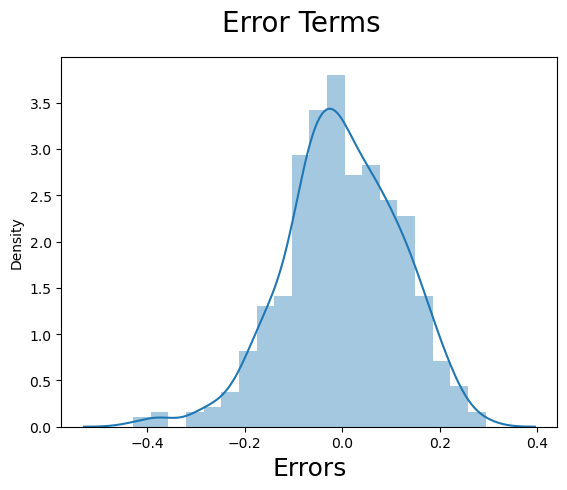

In [230]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)  

In [232]:
X_train_rfe2

,const,yr,holiday,temp,weekday_Mon,weekday_Tues,weathersit_C
653,1.0,1,0,0.509887,False,False,False
576,1.0,1,0,0.815169,False,False,False
426,1.0,1,0,0.442393,True,False,False
728,1.0,1,0,0.245101,False,True,False
482,1.0,1,0,0.395666,True,False,False
...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,False,False,False
578,1.0,1,0,0.863973,False,False,False
53,1.0,0,0,0.202618,False,False,False
350,1.0,0,0,0.248216,True,False,False


In [238]:
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [240]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,29.793347,63.7917,5.459106,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
535,1,0,1,32.082500,59.2083,7.625404,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
299,0,0,1,19.270000,81.2917,13.250121,False,False,True,False,...,True,False,False,True,False,False,False,False,True,False
221,0,0,1,31.433347,42.4167,13.417286,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
152,0,0,1,29.315000,30.5000,19.583229,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


In [258]:
col2=b.columns
col2

Index(['yr', 'holiday', 'workingday', 'temp', 'weekday_Mon', 'weekday_Tues',
       'weathersit_C'],
      dtype='object')

In [260]:
X_test_rfe2 = X_test[col2]

In [262]:
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   workingday    219 non-null    int64  
 4   temp          219 non-null    float64
 5   weekday_Mon   219 non-null    bool   
 6   weekday_Tues  219 non-null    bool   
 7   weathersit_C  219 non-null    bool   
dtypes: bool(3), float64(2), int64(3)
memory usage: 10.9 KB


In [264]:
y_pred = lm3.predict(X_test_rfe2)

ValueError: shapes (219,8) and (7,) not aligned: 8 (dim 1) != 7 (dim 0)

In [266]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

NameError: name 'y_pred' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
# The R-squared is 72% and hence this is the best model with the 6 variables.